# LSA

In [1]:
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import randomized_svd

In [48]:
class LSA:
    def __init__(self, doc_ls, topic_num):
        self.doc_ls = doc_ls
        self.k = topic_num
        self.term2idx, self.idx2term = self.toIdxDict( ' '.join(doc_ls).split()  )
        self.doc2idx, self.idx2doc = self.toIdxDict( doc_ls )
        
        self.tdm = self.TDM(doc_ls)
        
        self.U, self.s, self.Vt = self.SVD(self.tdm)
        
        self.term_mat = self.TermVectorMatrix(self.U, topic_num)
        self.doc_mat = self.DocVectorMatrix(self.Vt, topic_num)
        
    def toIdxDict(self, ls):
        any2idx = defaultdict(lambda : len(any2idx))
        idx2any = defaultdict()
        
        for item in ls:
            idx2any[any2idx[item]] = item
        
        return any2idx, idx2any
        
    
    def TDM(self, doc_ls):
        tdm = np.zeros([len(self.term2idx), len(doc_ls)])
        for doc in doc_ls:
            doc_idx = self.doc2idx[doc]
            for term in doc.split():
                tdm[self.term2idx[term], doc_idx] += 1
        return tdm
    
    
    def SVD(self, tdm):
        U, s, Vt = randomized_svd(tdm, n_components=12)
        return U, s, Vt
    
    def TopicModeling(self, count=4):
        for i in range(self.k):
            score = self.U[:, i].T
            sorted_index = np.argsort(-score)

            topic_keywords = []
            for j in sorted_index[:count]:
                topic_keywords.append((self.idx2term[j], score[j].round(3)))
                
            print('topic {} : {}'.format(i + 1, topic_keywords))
    
    def GetTermVector(self, term):
        vect = self.term_mat[self.term2idx[term]]
        return vect
    
    def GetDocVector(self, doc):
        vect = self.doc_mat[self.doc2idx[doc]]
        return vect
    
    def TermVectorMatrix(self, u, topic_num):
        term_mat = np.matrix(u[:, :topic_num])
        return term_mat
    
    def DocVectorMatrix(self, vt, topic_num):
        doc_mat = np.matrix(vt[:topic_num, :].T)
        return doc_mat
    
    def GetTermSimilarity(self, term1, term2):
        return cosine_similarity(self.GetTermVector(term1), self.GetTermVector(term2))
    
    def GetDocSimilarity(self, doc1, doc2):
        return cosine_similarity(self.GetDocVector(doc1), self.GetDocVector(doc2))
    
    
    

In [49]:
doc_ls = ['바나나 사과 포도 포도 짜장면',
         '사과 포도',
         '포도 바나나',
         '짜장면 짬뽕 탕수육',
         '볶음밥 탕수육',
         '짜장면 짬뽕',
         '라면 스시',
         '스시 짜장면',
         '가츠동 스시 소바',
         '된장찌개 김치찌개 김치',
         '김치 된장 짜장면',
         '비빔밥 김치'
         ]

lsa = LSA(doc_ls, 3)
lsa.TopicModeling(4)


topic 1 : [('포도', 0.697), ('짜장면', 0.486), ('사과', 0.348), ('바나나', 0.348)]
topic 2 : [('짜장면', 0.584), ('짬뽕', 0.356), ('김치', 0.337), ('스시', 0.256)]
topic 3 : [('김치', 0.611), ('된장찌개', 0.264), ('김치찌개', 0.264), ('비빔밥', 0.185)]


In [50]:
lsa.GetTermVector('사과')

matrix([[ 0.34843127, -0.19370961,  0.01592593]])

In [51]:
lsa.GetTermVector('포도')


matrix([[ 0.69686254, -0.38741921,  0.03185185]])

In [52]:
lsa.GetTermSimilarity('사과', '포도')

array([[1.]])

In [53]:
lsa.GetTermSimilarity('사과', '짜장면')

array([[0.18015103]])

In [55]:
lsa.GetTermSimilarity('탕수육', '짜장면')

array([[0.8971129]])

In [56]:
lsa.GetDocSimilarity('사과 포도', '포도 바나나')

array([[1.]])

In [58]:
lsa.GetDocSimilarity('된장찌개 김치찌개 김치', '김치 된장 짜장면')

array([[0.81136402]])

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

n_topic = 3
tfidf_vect = TfidfVectorizer(max_features=1000, max_df=0.5, smooth_idf=True)
tfidf = tfidf_vect.fit_transform(doc_ls)
svd = TruncatedSVD(n_components=n_topic, n_iter=50)



In [63]:
U = svd.fit_transform(tfidf)
U

array([[ 0.86225676, -0.49144782,  0.00452944],
       [ 0.63275132, -0.55581095,  0.02352865],
       [ 0.63275132, -0.55581095,  0.02352865],
       [ 0.51857348,  0.59677086, -0.37927778],
       [ 0.13831749,  0.21256885, -0.26226827],
       [ 0.53467059,  0.57461739, -0.27972647],
       [ 0.17437388,  0.26993096,  0.70582491],
       [ 0.48293111,  0.52196733,  0.49938157],
       [ 0.1473545 ,  0.23287693,  0.64784311],
       [ 0.07475499,  0.11348537, -0.19890931],
       [ 0.35037073,  0.36376636, -0.21927221],
       [ 0.08846231,  0.1315425 , -0.21671164]])

In [64]:
Vt = svd.components_
Vt

array([[ 0.03615365,  0.10978603,  0.01834125,  0.09862335,  0.01834125,
         0.05470036,  0.3297113 ,  0.04131708,  0.02775026,  0.3297113 ,
         0.03615365,  0.21640648,  0.4991573 ,  0.29964085,  0.1641898 ,
         0.58250527],
       [ 0.06740048,  0.15347979,  0.03284554,  0.12078756,  0.03284554,
         0.09988705, -0.28961955,  0.07490311,  0.04867686, -0.28961955,
         0.06740048,  0.31494725,  0.43992407,  0.39142644,  0.23904844,
        -0.51167464],
       [ 0.25326653, -0.21577691, -0.07776122, -0.09834554, -0.07776122,
         0.35279702,  0.01226021, -0.12482955, -0.10832038,  0.01226021,
         0.25326653,  0.70278052, -0.07237264, -0.29248516, -0.25719626,
         0.02166027]])

In [71]:
vocab  = tfidf_vect.get_feature_names()
n = 4
for idx, topic in enumerate(Vt):
    print('topic : ', idx + 1)
    for i in np.argsort(-topic)[:n]:
        print(vocab[i], topic[i].round(5), end=' ')
    print('')
        
#     print("Topic {}".format(idx + 1), [(vocab[i], topic[i].round(5)) for i in np.argsort(-topic)[:n]])

topic :  1
포도 0.58251 짜장면 0.49916 바나나 0.32971 사과 0.32971 
topic :  2
짜장면 0.43992 짬뽕 0.39143 스시 0.31495 탕수육 0.23905 
topic :  3
스시 0.70278 라면 0.3528 소바 0.25327 가츠동 0.25327 


In [72]:
from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc("axes", unicode_minus=False)

In [76]:
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors):
    def cosine_similarity(a, b):
        return dot(a, b)/(norm(a) * norm(b))
    
    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))
    
    for i in range (n_word):
        for j in range(i, n_word):
            similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)
            
    return similarity_matrix

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_similarity(similarity_matrix):
    mask = np.triu(np.ones_like(similarity_matrix, dtype=np.bool))
    plt.rcParams['figure.figsize'] = [8, 6]
    ax = sns.heatmap(similarity_matrix, mask=mask, xticklabels=vocab, 
                        yticklabels=vocab, annot=True, fmt=".2f", 
                        annot_kws={'size':8}, cmap='coolwarm')

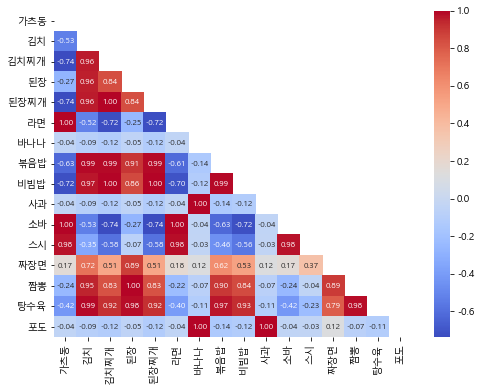

In [78]:
word_vectors = svd.components_.T
word_similarity = calc_similarity_matrix(word_vectors)
visualize_similarity(word_similarity)

In [79]:
!pip install pyLDAvis

  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=d06b616bd010dc2a53e0c0a9720e34efca4f755eeed5a2f9e5e05edd67b4b563
  Stored in directory: c:\users\714\appdata\local\pip\cache\wheels\f8\b1\9b\560ac1931796b7303f7b517b949d2d31a4fbc512aad3b9f284
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=dd11979c88e0190d83c3e1637fcf61c6cac1ed3c572f7b85b50868375437d80a
  Stored in directory: c:\users\714\appdata\local\pip\cache\wheels\56\b0\fe\4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built pyLDAvis future


In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\714\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [82]:
stop_words = stopwords.words('english')
def get_news():
    dataset = fetch_20newsgroups(shuffle=True, random_state=42, 
                                 remove=('headers', 'footers', 'quotes'))
    documents = dataset.data
    news_df = pd.DataFrame({'document': documents})
    news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
    news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : " ".join([w for w in x.split() if len(w) > 2]))
    news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : x.lower())
    
    tokenized_doc = news_df['clean_doc'].apply(lambda x : x.split())
    return tokenized_doc.apply(lambda x: ' '.join([item for item in x if item not in stop_words]))

tokenized_docs = get_news()
tokenized_docs.head()

C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


0    wondering anyone could enlighten car saw day d...
1    fair number brave souls upgraded clock oscilla...
2    well folks mac plus finally gave ghost weekend...
3    weitek address phone number like get informati...
4    article owcb world std com tombaker world std ...
Name: clean_doc, dtype: object

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def tokenize(text):
    return text.split()

tfidf_vect = TfidfVectorizer(tokenizer=tokenize)
tfidf = tfidf_vect.fit_transform(tokenized_docs)
lda = LatentDirichletAllocation(n_components=20)
lda_out = lda.fit_transform(tfidf)

C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)

C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

lda_pipeline = Pipeline([('tfidf_vect', TfidfVectorizer()),
                         ('lda', LatentDirichletAllocation(random_state=42))])
params = {'tfidf_vect__ngram_range':[(1, 1), (1, 2)],
         'lda__n_components': [5, 10, 20]}
                         
gs_lda = GridSearchCV(lda_pipeline, params, n_jobs=-1)
gs_lda = gs_lda.fit(tokenized_docs)



C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'lda__n_components': 5, 'tfidf_vect__ngram_range': (1, 1)}

In [90]:
gs_lda.best_params_

C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'lda__n_components': 5, 'tfidf_vect__ngram_range': (1, 1)}

In [93]:
vis = pyLDAvis.sklearn.prepare(gs_lda.best_estimator_.steps[1][1], tfidf, gs_lda.best_estimator_.steps[0][1], mds='tsne')
pyLDAvis.display(vis)

C:\Users\714\anaconda3\envs\kdigit\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
